In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## *Data Understading, Cleaning and Transformation* 

In [3]:
data = pd.read_csv("diabetes.csv")
data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [4]:
data.describe() # check max count, mean, max, an so on

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
data.isna().sum() #check for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.corr() # check correlation

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [8]:
data.groupby("DiabetesPedigreeFunction").mean() 

Pregnancies  Glucose  BloodPressure  SkinThickness  \
DiabetesPedigreeFunction                                                       
0.078                             0.0    102.0           52.0            0.0   
0.084                             6.0     87.0           80.0            0.0   
0.085                             4.0     91.0           66.0           24.5   
0.088                             1.5    149.0           67.0           10.0   
0.089                             0.0    117.0           80.0           31.0   
...                               ...      ...            ...            ...   
1.893                             0.0    180.0           66.0           39.0   
2.137                             3.0    173.0           82.0           48.0   
2.288                             0.0    137.0           40.0           35.0   
2.329                             4.0    197.0           70.0           39.0   
2.420                             0.0    180.0           78.0           63.0   

                          Insulin    BMI   Age  Outcome  
DiabetesPedigreeFunction                                 
0.078                         0.0  25.10  21.0      0.0  
0.084                         0.0  23.20  32.0      0.0  
0.085                        63.0  29.65  34.0      0.0  
0.088                        70.0  35.30  34.5      0.5  
0.089                        53.0  45.20  24.0      0.0  
...                           ...    ...   ...      ...  
1.893                         0.0  42.00  25.0      1.0  
2.137                       465.0  38.40  25.0      1.0  
2.288                       168.0  43.10  33.0      1.0  
2.329                       744.0  36.70  31.0      0.0  
2.420                        14.0  59.40  25.0      1.0  

[517 rows x 8 columns]

In [9]:
data.nunique().sort_values() 

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

In [12]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
data.describe().T.style.background_gradient(cmap='hot_r')

## *Data Analysis and Visualization* 

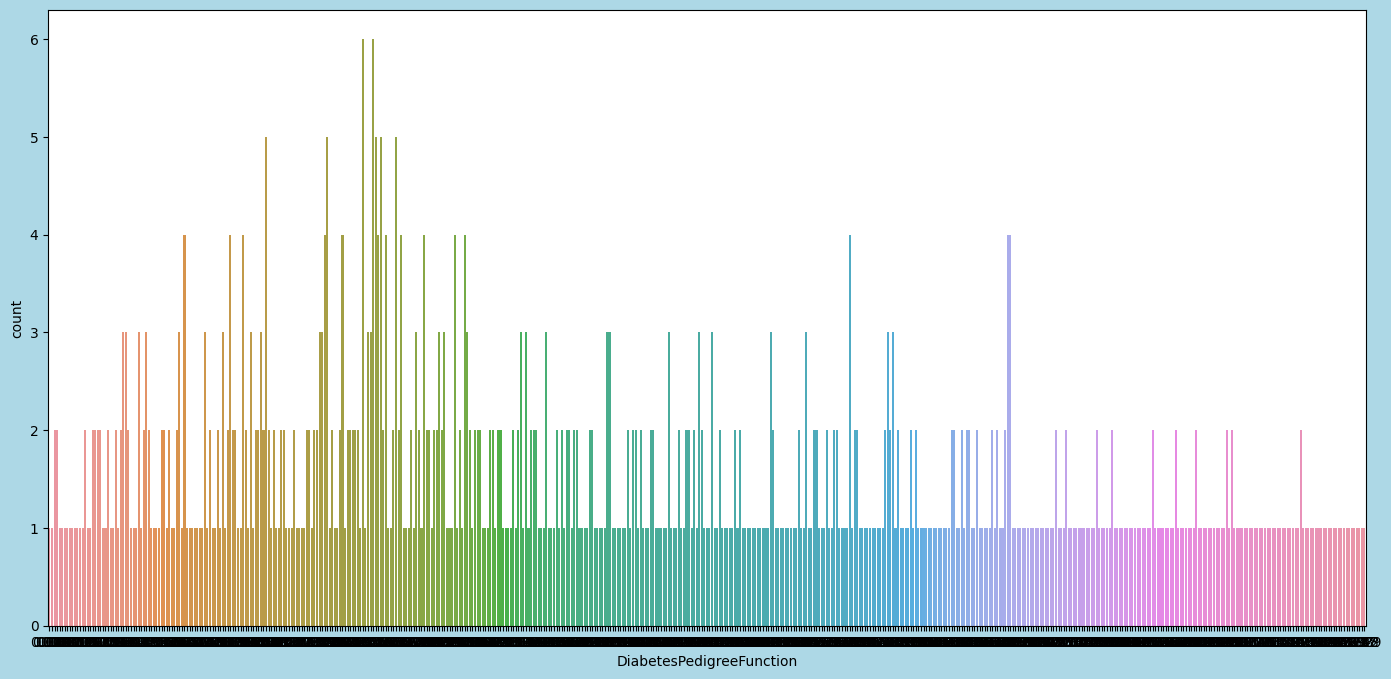

In [11]:
plt.figure(figsize=(17, 8), facecolor="lightBlue")
sns.countplot(x = "DiabetesPedigreeFunction", data = data)
plt.show()

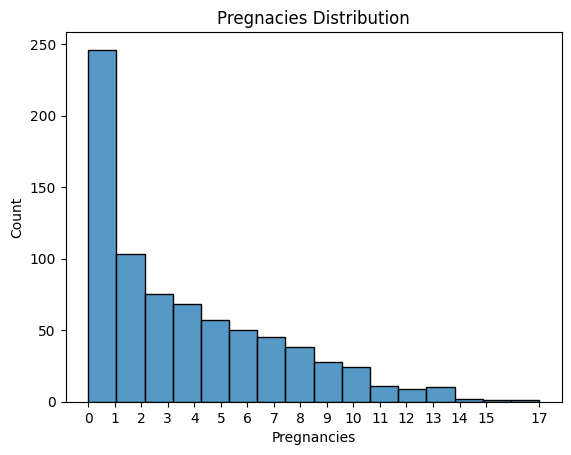

In [16]:
cols = data.columns
colors = ['Blue',"Green","Red","Black"]
plt.title("Pregnacies Distribution") 
sns.histplot(data = data, x = data[cols[0]]) #cols[0] == pregancies
plt.xticks(ticks=[i for i in data[cols[0]].unique()])
plt.show()

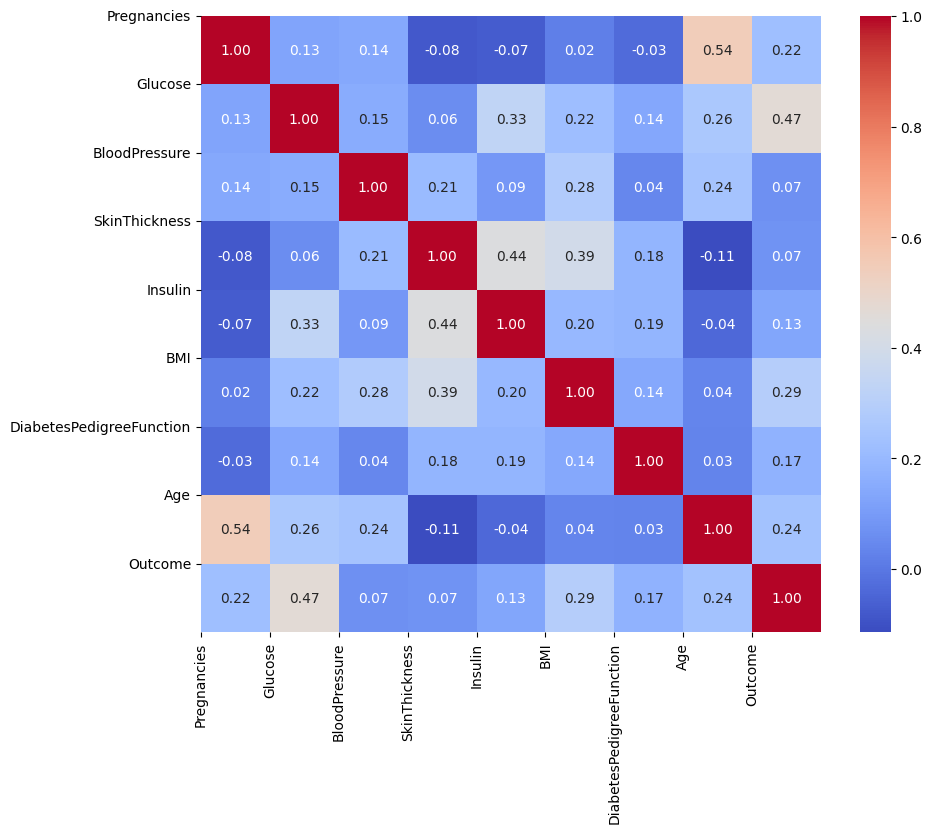

In [17]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8))#Plot figsize
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")#Generate Heat Map, allow annotations and place floats in map
plt.xticks(range(len(corr.columns)), corr.columns)#Apply xticks
plt.yticks(range(len(corr.columns)), corr.columns)#Apply yticks
plt.show()#show plot

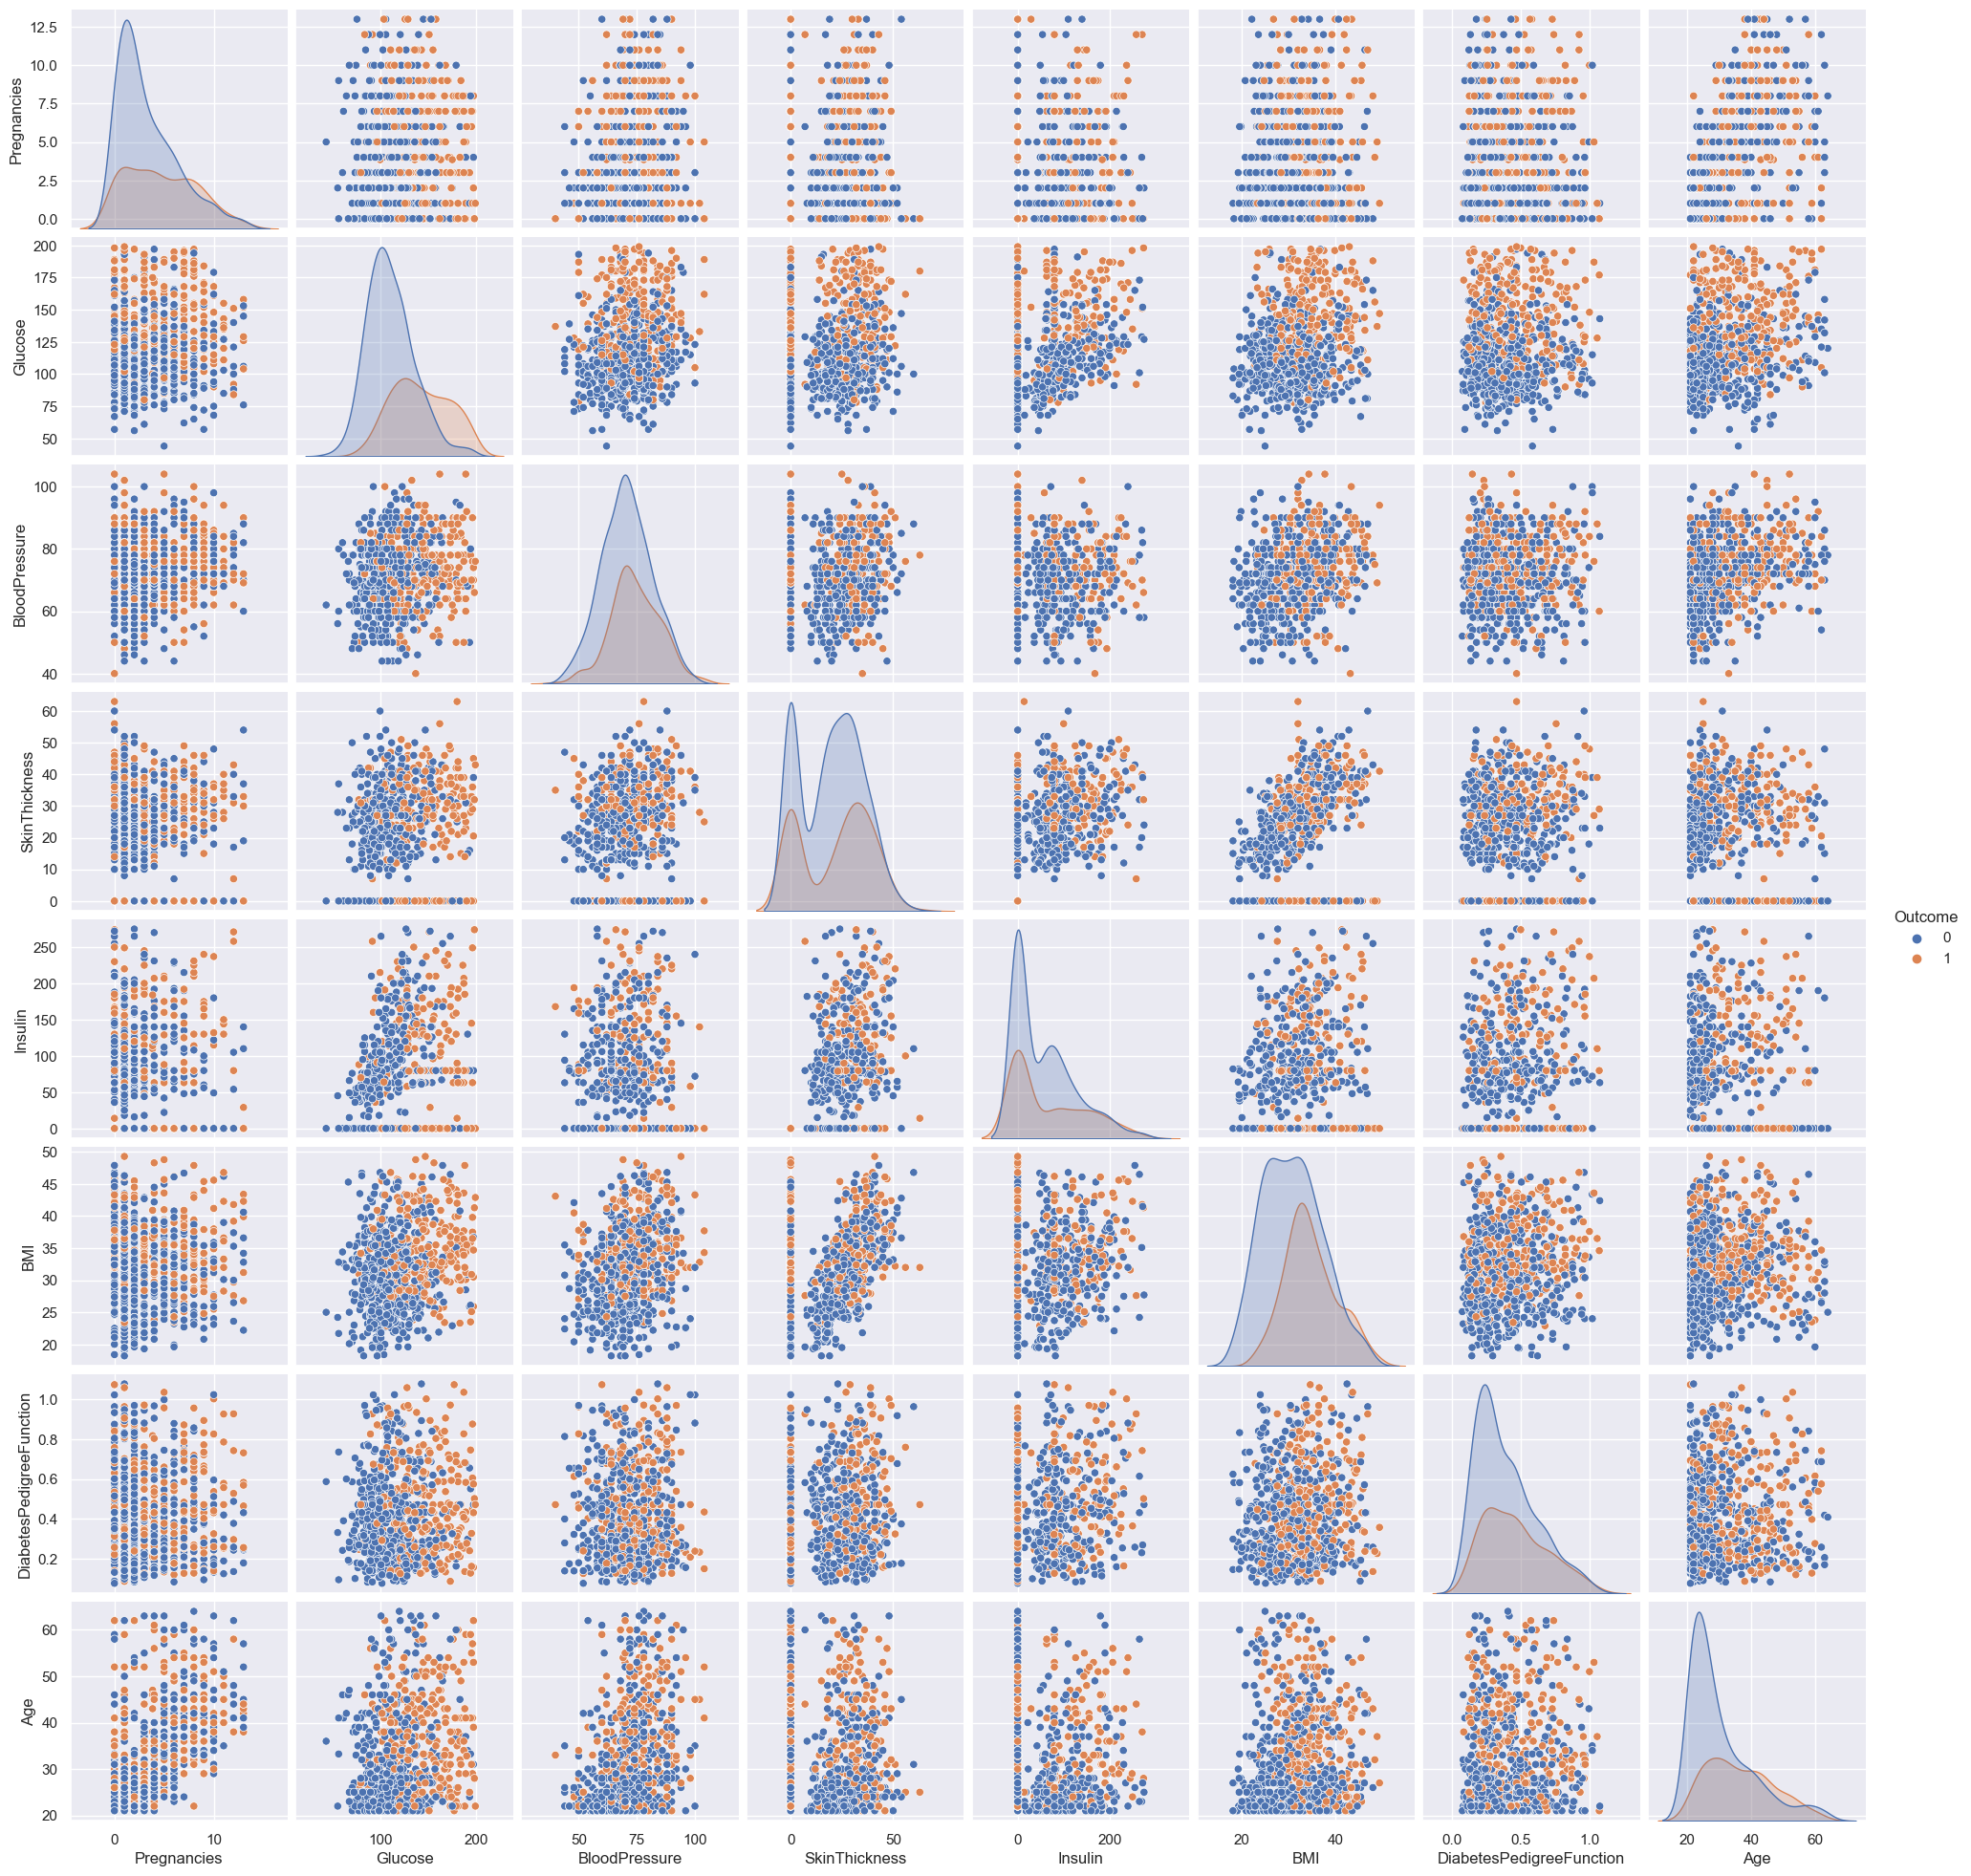

In [40]:
columns = data.columns
sns.set()
sns.pairplot(data[columns], hue='Outcome',hue_order=[0,1]) #pairplot to show the data points for all the columns in the dataset
plt.show()

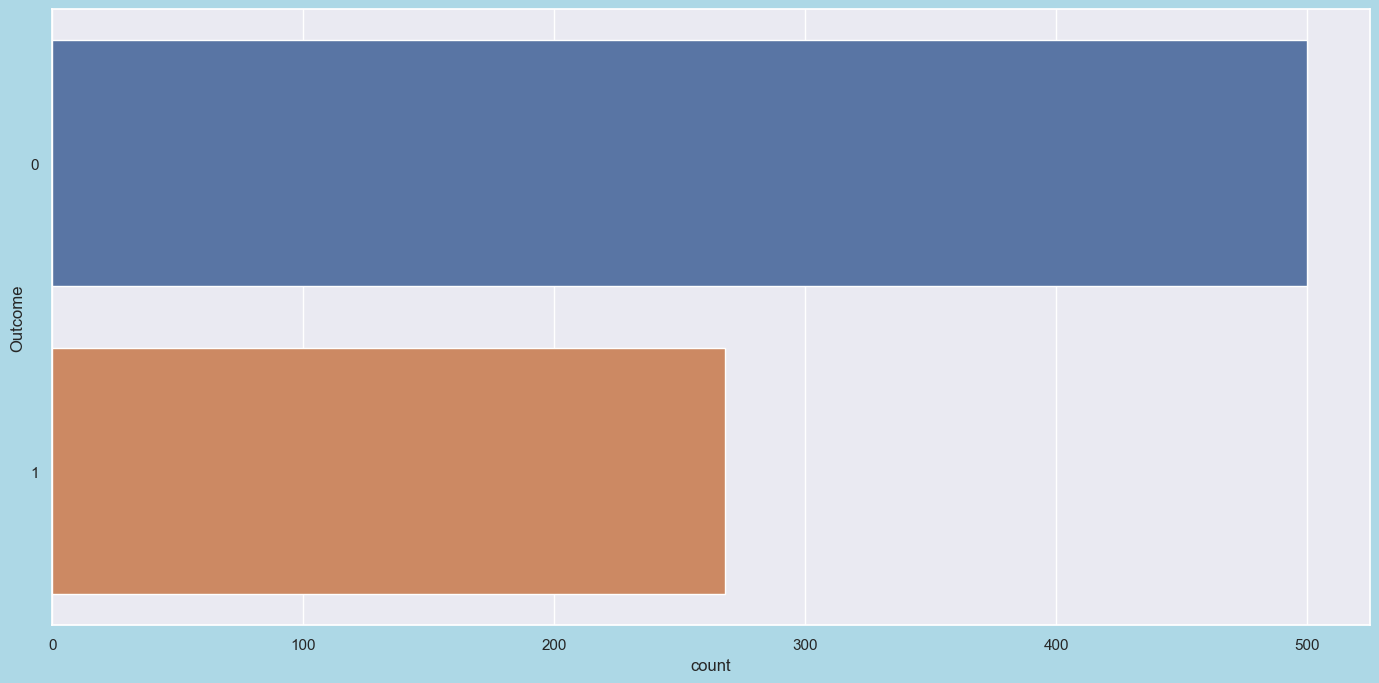

In [29]:
plt.figure(figsize=(17, 8), facecolor="lightBlue")
sns.countplot(y = data.iloc[:,8],data = data)
plt.show()

From, the countplot above it can be observed the most of the data in the dataset dont have diabetes as the outcome of "0" is twice as greater as that of one.


Text(0.5, 0.98, 'Visualizing continuous columns')

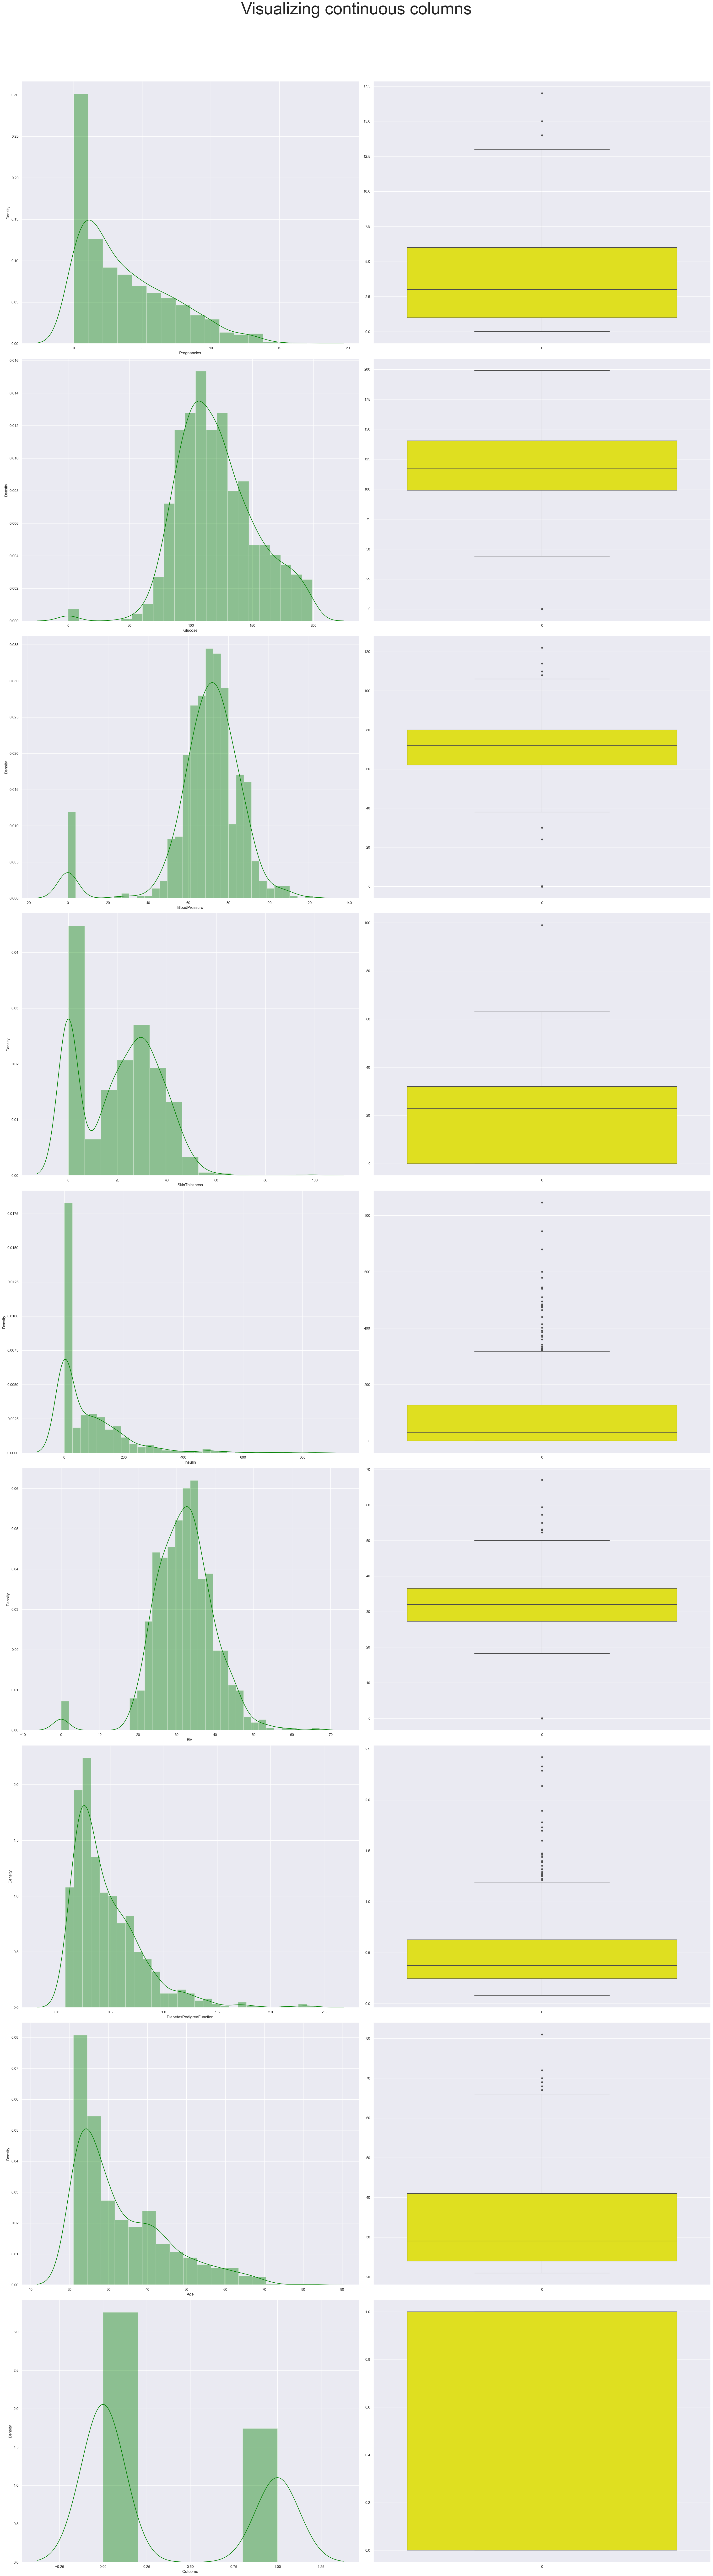

In [20]:
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
fig,ax = plt.subplots(9,2,figsize=(30,110)) #subplots to plot each column of the dataset
for index,i in enumerate(data.columns): #iterate through each dataset column
    sns.distplot(data[i], ax=ax[index,0], color='green') 
    sns.boxplot(data[i], ax=ax[index,1], color='yellow')
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
plt.suptitle("Visualizing continuous columns",fontsize=50)

<AxesSubplot: >

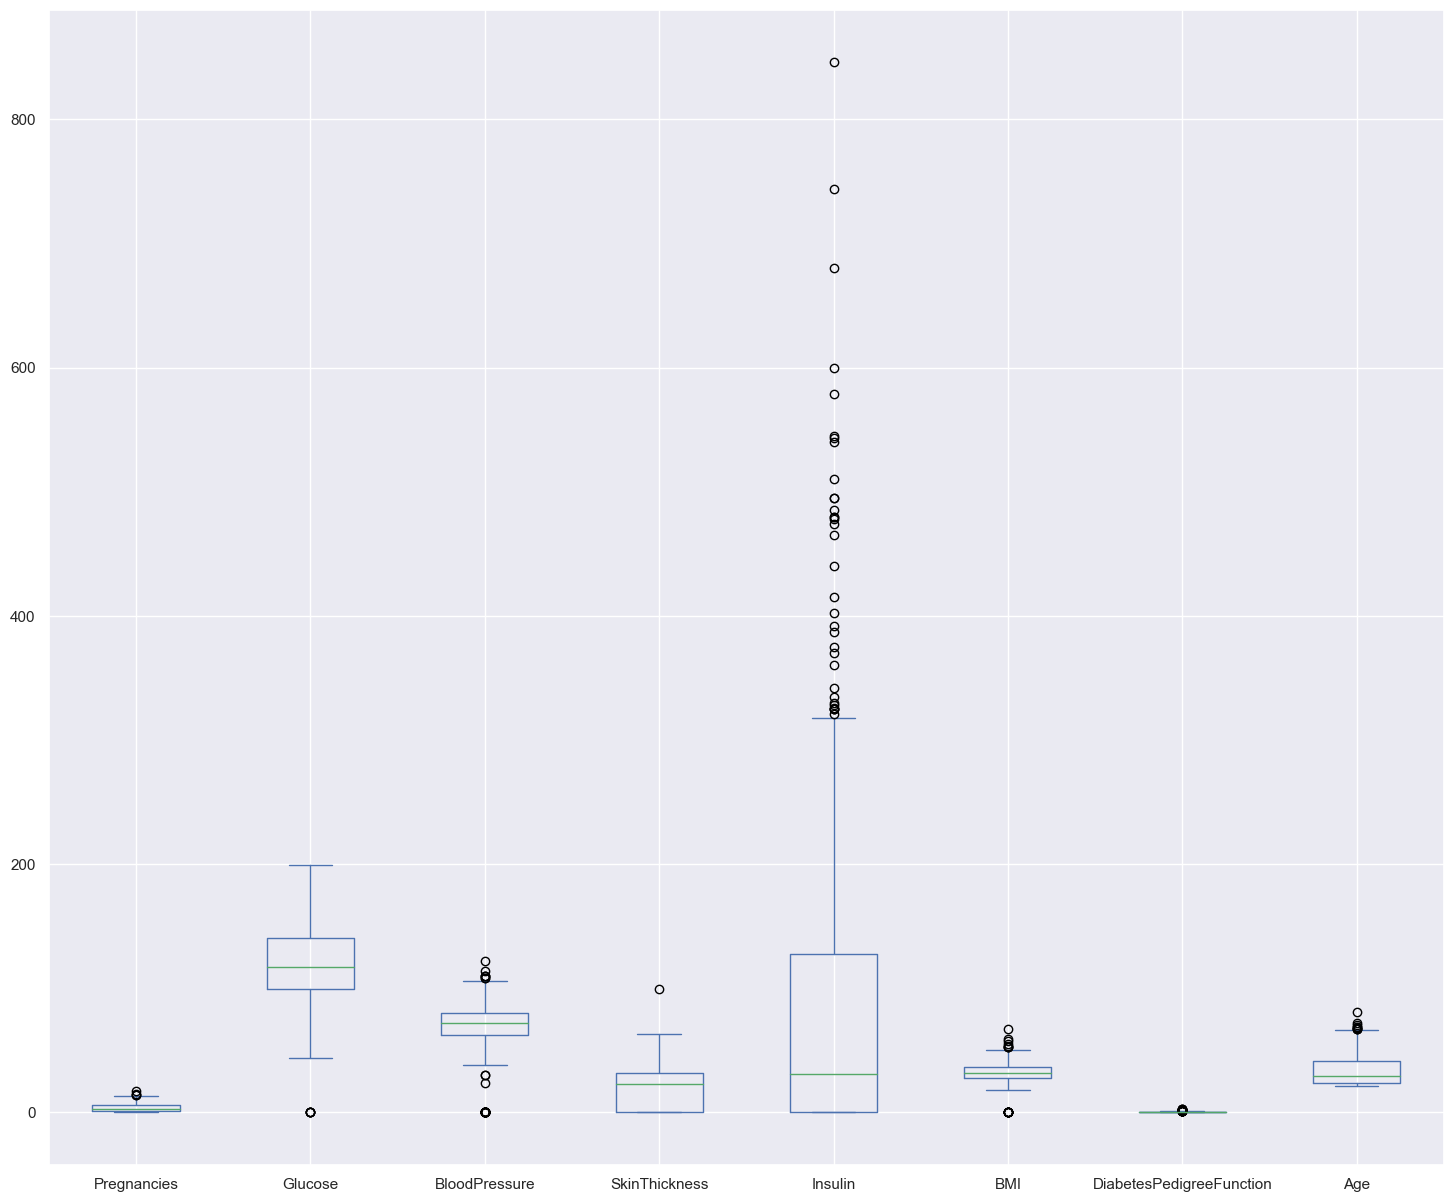

In [27]:
data_box = data.iloc[:, :-1]
data_box.plot(figsize = (18, 15), kind = "box", layout = (4, 4), sharex = False) #box plot to view outliers 

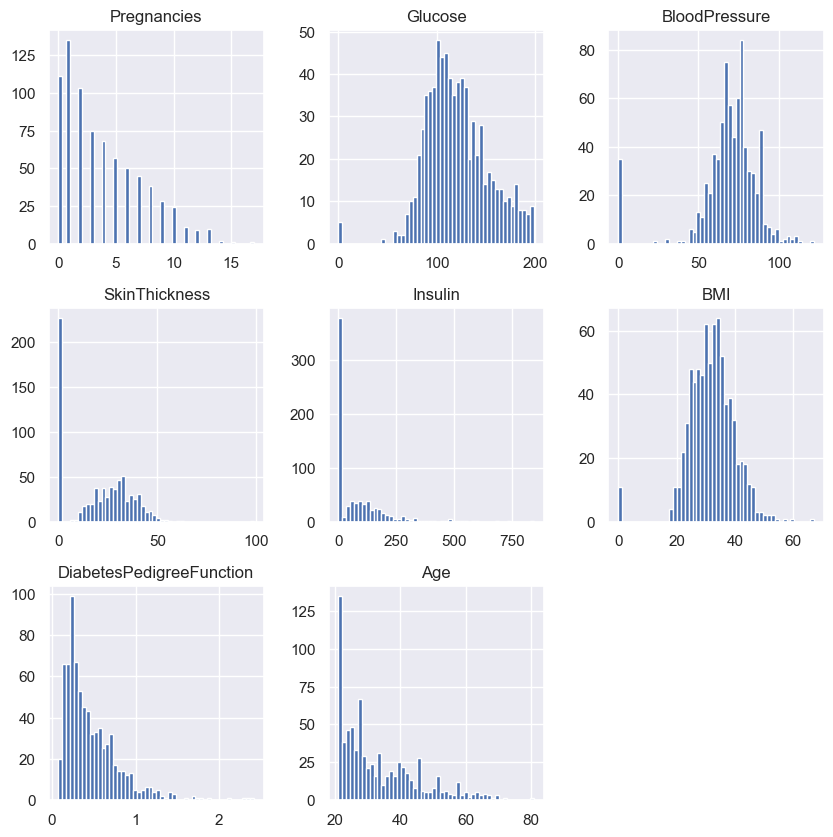

In [26]:
data_hist = data.iloc[:, :-1]
data_hist.hist(figsize = (10,10), bins = 50) #hist plots 
plt.show()

In [30]:
def detect_outliers(column): # handling the outliers
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    IQR = q3 - q1 #calculate inter-quartile range
    
    return data[column][(data[column] < (q1-1.5*IQR))|(data[column] > (q3 + 1.5*IQR))].tolist() # return detected outliers

In [31]:
def replace_outlier_with_mean(column, outliers):
    data[column] = np.where(data[column].isin(outliers),data[column].mean(),data[column])
    return data[column] 

In [37]:
pregnancy_outliers = detect_outliers(cols[0]) # pass columnn index for each column to detect_outliers func
glucose_outliers = detect_outliers(cols[1])
bp_outliers = detect_outliers(cols[2])
skinthickness_outliers = detect_outliers(cols[3])
insulin_outliers = detect_outliers(cols[4])
bmi_outliers = detect_outliers(cols[5])
DiabetesPidigreeFunction_outliers = detect_outliers(cols[6])
age_outliers = detect_outliers(cols[7])

outliers = [pregnancy_outliers, #make list store outliers for each column
           glucose_outliers,
            bp_outliers,
            skinthickness_outliers,
            insulin_outliers,
            bmi_outliers,
            DiabetesPidigreeFunction_outliers,
            age_outliers
           ]

In [38]:
for i, col in enumerate(cols[:-1]):
    data[col] = replace_outlier_with_mean(col, outliers[i])

In [39]:
for col in cols[:-1]:
    print(f"{col}:\t {detect_outliers(col)}") #format output and display outliers

Pregnancies:	 []
Glucose:	 []
BloodPressure:	 []
SkinThickness:	 []
Insulin:	 [270.0, 271.0, 275.0, 265.0, 274.0, 272.0, 265.0]
BMI:	 [49.3]
DiabetesPedigreeFunction:	 [1.072, 1.076, 1.034, 1.057]
Age:	 [62.0, 63.0, 63.0, 62.0, 63.0, 64.0, 62.0, 62.0, 63.0]


## **Logistic Regression Model** 

In [72]:
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, 0:-1] #indepemdent variables
Y = data.iloc[:,8] # dependet variables
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) #standarize and scale the independent var columns
X_scaled = np.insert(X_scaled, 0, values=1, axis=1)

In [73]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                    0.627000  50.0  
1                    0.351000  31.0  
2                    0.672000  32.0  
3                    0.167000  21.0  
4                    0.471876  33.0  
..                        ...   ...  
763                  0.171000  63.0  
764                  0.340000  27.0  
765                  0.245000  30.0  
766                  0.349000  47.0  
767                  0.315000  23.0  

[768 rows x 8 columns]

In [74]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split #train_test split

X_train,X_test,Y_train,Y_test = train_test_split(X_scaled, Y, test_size=0.3,random_state=42)

In [68]:
X_test.shape

(231, 9)

In [76]:
Y_test.shape

(231,)

In [77]:
X_train.shape

(537, 9)

In [90]:
#Optimal β's using gradient descent
n = 1000 #number of iterations
alpha = 0.01  # learning rate

m,k = X_train.shape# Get the number of samples (m) and the number of features (k)
beta = np.zeros(k) # Initialize the coefficients (beta) with zeros
for i in range(n): # Start the gradient descent algorithm
  cost_gradient = np.zeros(k) # Initialize the cost gradient with zeros
  z = X_train.dot(beta) # Calculate the dot product of X_train and beta
  predicted = 1/(1+np.exp(-z)) # Calculate the predicted probabilities using the sigmoid function
  difference = predicted-Y_train
  for j in range(k):
    cost_gradient[j] = np.sum(difference.dot(X_train[:,j]))
  for j in range(k):   # Update the coefficients using the calculated gradient and the learning rate
    beta[j] = beta[j]-(alpha/m)*cost_gradient[j]
print(beta)# Print the final values of the coefficients

[-0.63364608  0.09632378  0.87173858  0.05033086 -0.01303719  0.04118921
  0.4490355   0.19000094  0.43787104]


In [79]:
#Predicting and Labeling
Y_predict = 1/(1+np.exp(-(X_test.dot(beta))))
Y_label = np.zeros(len(Y_predict))
for i in range(len(Y_predict)):
  if(Y_predict[i]>=0.5): # if > 0.5 then predict == 1
    Y_label[i]=1

## **PCA**

Eigenvalues:
[1.98956883 1.87987718 0.98782844 0.86187671 0.83719861 0.65435484
 0.41541747 0.38430817]

Variances (Percentage):
[24.83722805 23.46786778 12.33177751 10.75943089 10.45135634  8.16878522
  5.18595703  4.79759716]



Text(0, 0.5, 'Explained variance (%)')

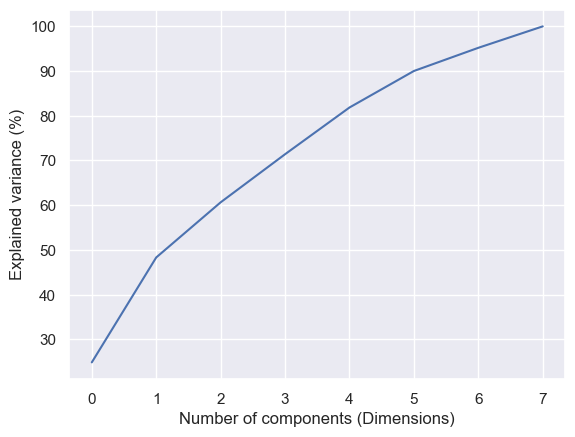

In [97]:
from sklearn.decomposition import PCA 

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
pca = PCA(n_components = None)
pca.fit(X_scaled)

print("Eigenvalues:")
print(pca.explained_variance_) # eigenvalues
print()

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100) # explained variances
print()

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100)) # Make the scree plot
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [94]:
x_data = pca.fit_transform(X_train) # standarize and scale the data
x_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_

print(explained_variance) #check explained variance

[0.25217272 0.23286579 0.12030923 0.10844182 0.10468208 0.08481068]


In [95]:
len(explained_variance) # length of exp var

6

In [98]:
print("Sorted List returned :")
print(sorted(explained_variance,reverse = True))

Sorted List returned :
[0.2521727228828294, 0.23286579442047817, 0.12030922729150628, 0.10844181937541582, 0.10468208014795831, 0.08481067658162653]


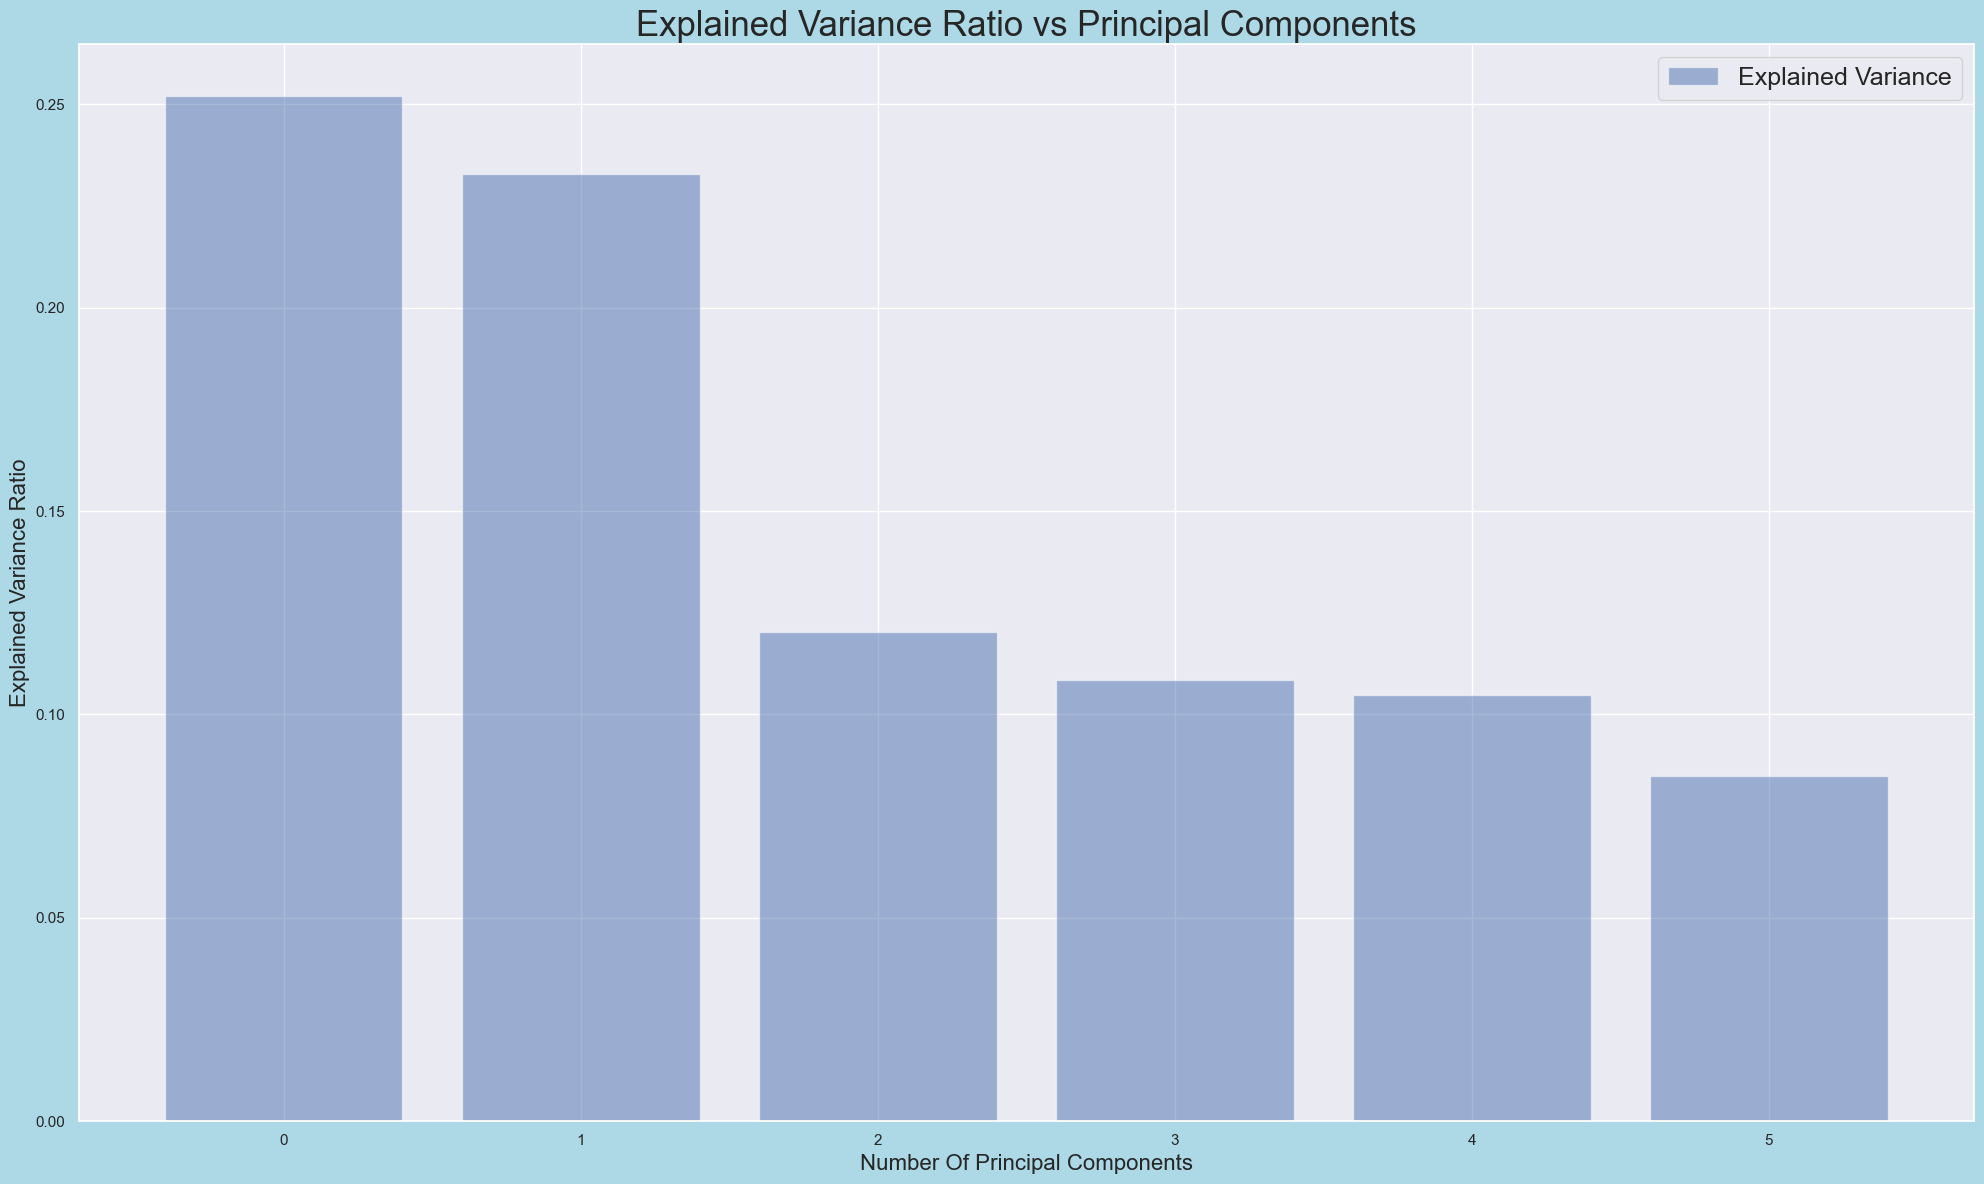

In [100]:
#plot figure to see the explainde variance ratio with the principal components
fig = plt.figure(figsize=(20, 12), facecolor="lightBlue") 
plt.bar(range(6), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 16)
plt.xlabel('Number Of Principal Components',fontsize = 16)
plt.title('Explained Variance Ratio vs Principal Components',fontsize = 25)
plt.legend(loc = 'best', fontsize = 18)
plt.tight_layout()
plt.show()

In [81]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X) #standarize and scale the data

from sklearn.decomposition import PCA #import pca
pca = PCA(n_components = 6) #taking 6 n components
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca) #create a df 
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

          0         1         2         3         4         5
0  1.677319 -0.602747  0.742199 -0.179788  0.168843 -0.605195
1 -1.550171  0.092458 -0.036027  0.437243  0.626074  0.269368
2  0.060701 -1.532724  1.731688 -1.455244 -1.530492 -0.583709
3 -1.776480  0.788124 -0.486413  0.915976 -0.112804  0.585716
4 -0.003427  2.691043  0.621624  0.803343 -1.138837 -2.240665

Size: 
(768, 6)


## **Performance Evaluation**:

In [91]:
# Initialize the count of True Positives, True Negatives, False Positives, and False Negatives
Tp = 0 # True Positives
Tn = 0 # True Negatives
Fp = 0 # False Positives
Fn = 0 # False Negatives

Y_test = np.array(Y_test).reshape(-1,1)# Reshape Y_test to a 2D array

# Loop through each example in the test set
for i in range(len(Y_label)):
    
    if(Y_test[i] == 1 and Y_label[i] == 1): # If Y_test is 1 and Y_label is also 1, increment the count of True Positives
        Tp = Tp + 1
    if(Y_test[i] == 1 and Y_label[i] == 0): # If Y_test is 1 and Y_label is 0, increment the count of False Negatives
        Fn = Fn + 1
    if(Y_test[i] == 0 and Y_label[i] == 1): # If Y_test is 0 and Y_label is 1, increment the count of False Positives
        Fp = Fp + 1
    if(Y_test[i] == 0 and Y_label[i] == 0): # If Y_test is 0 and Y_label is also 0, increment the count of True Negatives
        Tn = Tn + 1

print(Tp, Tn, Fp, Fn) # Print the count of True Positives, True Negatives, False Positives, and False Negatives


47 119 32 33


In [92]:
tpr = Tp / (Tp + Fn) # Calculate True Positive Rate
fpr = Fp / (Fp + Tn) # Calculate False Positive Rate
print(tpr, fpr) # Print True Positive Rate and False Positive Rate

0.5875 0.2119205298013245


Accuracy checks how often the classifier is correct in general.
This can be used when the number of cases are balanced for all classes.
Accuracy = (TP/TN)/Total

When the predicted value is true, precision is used to check how often the value is correct.
This can be used when type one error is important.
Eg: In recommendation systems. The recommendation system should give false positive results.
Precision = True Positive / Predicted True

When the actual value is true, recall is used to check how often the predicted value is true.
This can be used when type two error is important.
Eg: In medical reports. The medical reports should not give false negative results.
Recall = True Positive / Actual True

The weighted average of recall and precision. It is the harmonic mean of precision and recall.
This can be used instead of accuracy when number of cases are imbalanced for different classes.
This can be used when neither precision or recall is so important and an optimal solution is required.
F1 Score = 2 / ( (1/Precision) + (1/Recall) )

In [84]:
accuracy=(Tp+Tn)/(Tp+Tn+Fp+Fn) #find accuracy
precision_pos=Tp/(Tp+Fp) #formula to find precision for positive class
recall_pos=Tp/(Tp+Fn)  #formula to find recall for positive class
f1_score_pos=2*precision_pos*recall_pos/(precision_pos+recall_pos) 
print(precision_pos,recall_pos,f1_score_pos) #printing

precision_neg=Tn/(Tn+Fn) #formula to find precision for negative class
recall_neg=Tn/(Tn+Fp) #formula to find recall for negative class
f1_score_neg=2*precision_neg*recall_neg/(precision_neg+recall_neg) 
print(precision_neg,recall_neg,f1_score_neg) #printing

0.5949367088607594 0.5875 0.5911949685534591
0.7828947368421053 0.7880794701986755 0.7854785478547855


In [85]:
#Macro Average:
macro_precision=(precision_pos+precision_neg)/2 #formula to find macro precision
macro_recall=(recall_pos+recall_neg)/2  #formula to find macro recall
macro_f1_score=(f1_score_pos+f1_score_neg)/2 
print(macro_precision,macro_recall,macro_f1_score)

0.6889157228514324 0.6877897350993378 0.6883367582041223


In [86]:
#Weighted Average:
l1=len(Y_test[Y_test==0])
l2=len(Y_test[Y_test==1])
weighted_precision=(l1*precision_neg+l2*precision_pos)/(l1+l2)
weighted_recall=(l1*recall_neg+l2*recall_pos)/(l1+l2)
weighted_f1_score=(l1*f1_score_neg+l2*f1_score_pos)/(l1+l2)
print(weighted_precision,weighted_recall,weighted_f1_score)

0.7178010474979164 0.7186147186147186 0.7181941913867936


In [87]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_label))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.59      0.59      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_label)
print(confusion_matrix)

[[119  32]
 [ 33  47]]


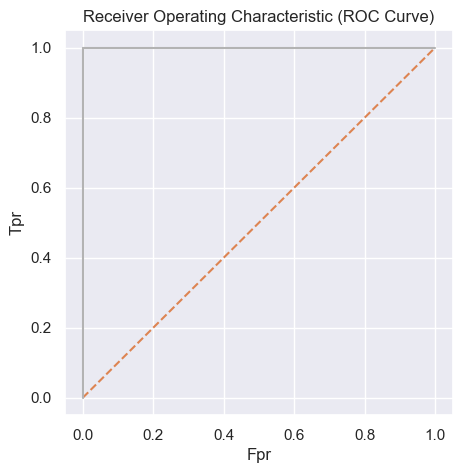

In [103]:

import matplotlib.pyplot as plt #ROC Curve

plt.subplots(1, figsize=(5,5)) #subplots for visulization
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('Tpr')
plt.xlabel('Fpr')
plt.show()

## *Conclusion* 

The ROC curve shows the correspondence of the true positives with the false positive rates


Here, the regression model has an overall accuracy of 72%, 69% macro average and 72% weighted average.
Therefore, theLOGISTIC REGRESSION MODEL seems to be a good one.